In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hv1rDwO_JaFwM78bJTa2CwIYagFoI7ODh4qYkQvPSbEp',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'custommodeldeployment-donotdelete-pr-y07m9otvbaco72'
object_key = 'Liver_Disease_Patient_Records.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Check if there are duplicates

In [6]:
data_duplicate = df[df.duplicated(keep = False)] 
# keep = False gives you all rows with duplicate entries
data_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [7]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
df.shape


(570, 11)

# Checking if there are any NULL values in our Dataset

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
df.loc[:,'Gender'] = le.transform(df['Gender'])
#Also transform Selector variable into usual conventions followed
df = df.dropna(how = 'any', axis = 0)

df['Dataset'] = df['Dataset'].map({2:0, 1:1})

In [11]:
df.isnull().values.any()

False

In [12]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Determine statistics based on age


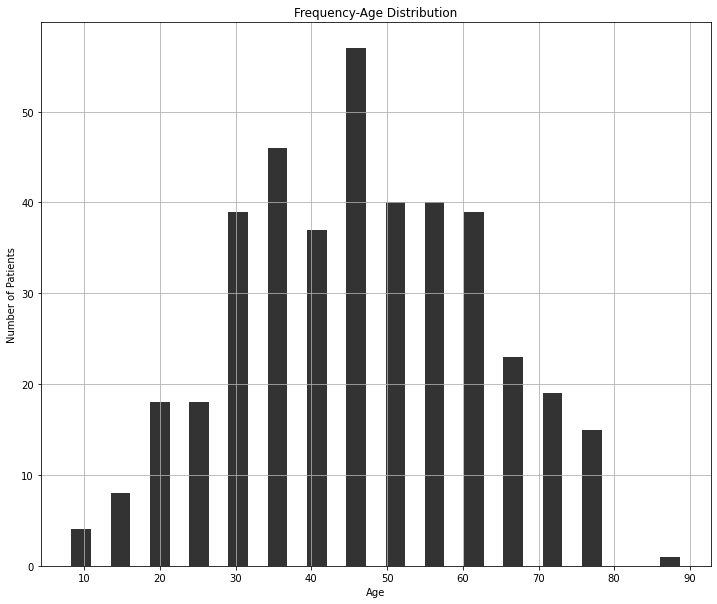

In [13]:
plt.figure(figsize=(12, 10))
plt.hist(df[df['Dataset'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.show()

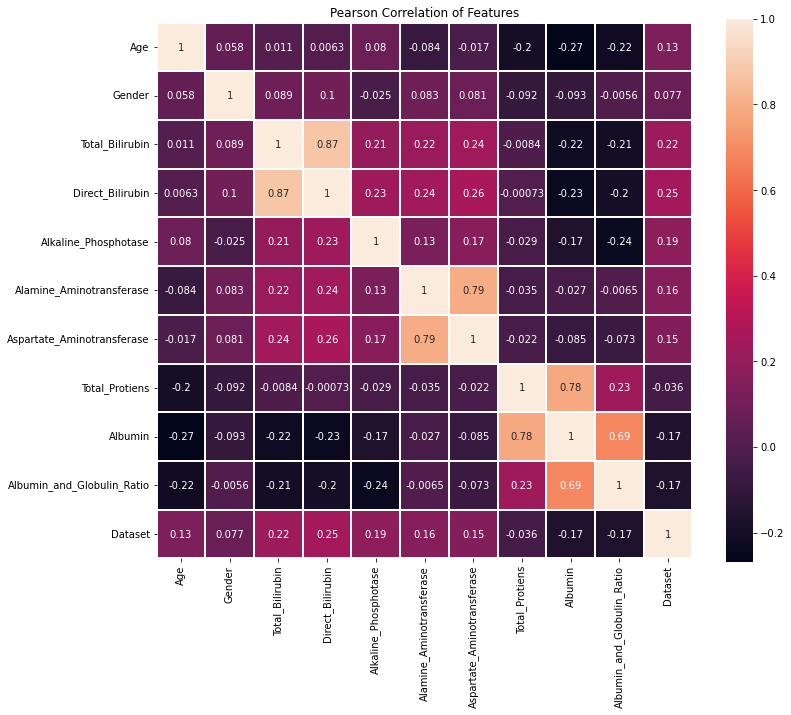

In [14]:
#Looking at the age vs. frequency graph, we can observe that middle-aged people are the worst affected.
#Even elderly people are also suffering from liver ailments,
#as seen by the bar sizes at ages 60-80.

#correlation-matrix
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

In [15]:
'''
The correlation matrix gives us the relationship between two features. As seen above, the following pairs of features seem to be very closely related as indicated by their high correlation coefficients:

1.Total Bilirubin and Direct Bilirubin(0.87)
2.Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase(0.79)
3.Albumin and Total Proteins(0.78)
4.Albumin and Albumin-Globulin Ratio(0.69)
'''

'\nThe correlation matrix gives us the relationship between two features. As seen above, the following pairs of features seem to be very closely related as indicated by their high correlation coefficients:\n\n1.Total Bilirubin and Direct Bilirubin(0.87)\n2.Sgpt Alamine Aminotransferase and Sgot Aspartate Aminotransferase(0.79)\n3.Albumin and Total Proteins(0.78)\n4.Albumin and Albumin-Globulin Ratio(0.69)\n'

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['Dataset'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (424, 10) (424,)
Test Set:  (142, 10) (142,)


# Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [19]:
logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
print("Logistic Regression Classifier on unscaled test data:")
print("Accuracy:", logreg.score(X_test, y_test))
print("Precision:", precision_score(y_test, logreg.predict(X_test)))
print("Recall:", recall_score(y_test, logreg.predict(X_test)))
print("F-1 score:", f1_score(y_test, logreg.predict(X_test)))

Logistic Regression Classifier on unscaled test data:
Accuracy: 0.7183098591549296
Precision: 0.7401574803149606
Recall: 0.9306930693069307
F-1 score: 0.824561403508772


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.svm import SVC

In [21]:
svc_clf = SVC(C = 0.1, kernel = 'rbf').fit(X_train, y_train)
print("SVM Classifier on unscaled test data:")
print("Accuracy:", svc_clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, svc_clf.predict(X_test)))
print("Recall:", recall_score(y_test, svc_clf.predict(X_test)))
print("F-1 score:", f1_score(y_test, svc_clf.predict(X_test)))

SVM Classifier on unscaled test data:
Accuracy: 0.7112676056338029
Precision: 0.7112676056338029
Recall: 1.0
F-1 score: 0.831275720164609


In [22]:
#Using scaled data
svc_clf_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_clf_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, svc_clf_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 0.7112676056338029
Precision: 0.7112676056338029
Recall: 1.0
F-1 score: 0.831275720164609


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators = 20)
rfc.fit(X_train, y_train)
print("Random Forest Classifier on unscaled test data:")
print("Accuracy:", rfc.score(X_test, y_test))
print("Precision:", precision_score(y_test, rfc.predict(X_test)))
print("Recall:", recall_score(y_test, rfc.predict(X_test)))
print("F-1 score:", f1_score(y_test, rfc.predict(X_test)))

Random Forest Classifier on unscaled test data:
Accuracy: 0.704225352112676
Precision: 0.7565217391304347
Recall: 0.8613861386138614
F-1 score: 0.8055555555555555


# Model Deployment

In [25]:
!pip install ibm_watson_machine_learning

In [26]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"4xUsYulwPd5YdaEUVvhcseOQXvizaGreTVk4mNFFl4YO"
}
wml_client=APIClient(wml_credentials)

In [28]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
c1182326-b076-4d14-80de-a9fb1128237f  models  2022-11-13T09:47:45.840Z
------------------------------------  ------  ------------------------


In [29]:
space_id="c1182326-b076-4d14-80de-a9fb1128237f"

In [30]:
wml_client.set.default_space(space_id)

'SUCCESS'

In [31]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [32]:
model_name="demo_model"
deployment_name="demo_deploy"
model=rfc

In [33]:
software_spec_uid= wml_client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [34]:
model_props={
    wml_client.repository.ModelMetaNames.NAME: model_name,
    wml_client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [35]:
model_details= wml_client.repository.store_model(
    model=model,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [36]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Dataset',
  'schemas': {'input': [{'fields': [{'name': 'Age', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Total_Bilirubin', 'type': 'float64'},
      {'name': 'Direct_Bilirubin', 'type': 'float64'},
      {'name': 'Alkaline_Phosphotase', 'type': 'int64'},
      {'name': 'Alamine_Aminotransferase', 'type': 'int64'},
      {'name': 'Aspartate_Aminotransferase', 'type': 'int64'},
      {'name': 'Total_Protiens', 'type': 'float64'},
      {'name': 'Albumin', 'type': 'float64'},
      {'name': 'Albumin_and_Globulin_Ratio', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-13T10:01:35.393Z',
  'id': 'feca9971-4b77-4eec-b4ae-af7e0dd13601',
  'modified_at': '2022-11-13T10:01:38.634Z',
  'name': 'dem